In [12]:
import pandas as pd
import re
from tqdm.notebook import tqdm as tqdm_notebook
import re
from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import seaborn as sns
from itertools import combinations
import itertools
import csv

%matplotlib inline
pd.set_option('display.max_colwidth', None)

In [13]:
df = pd.read_csv('tickets_2.csv',
                 sep=';',
                 encoding='windows-1251')


In [14]:
df.head()

,start_dt,end_dt,sender_name,sender_email,theme,descr
0,2023-01-01 08:22:15+00,2023-01-01 19:14:50+00,content_problem,content_problem@tele2.ru,Жалоба абонента TT20595877,". Доброго времени суток! ПРОСЬБА ПРИ ОТВЕТЕ НА ЗАПРОС ИСПОЛЬЗЬЗОВАТЬ ФУНКЦИЮ ""ОТВЕТИТЬ ВСЕМ"" У абонента всплывает SIM-меню и блокирует работу телефона. Просьба отключить функционал сим-ремандера на апплете сим-карты. 0. Номер абонента : 79629002669 1. Дата и время заказа : 31,12,2022 2. Номер провайдера (для КЦ из InVoice / для розницы - номер подписки из WD) : - 3. Описание проблемы : не отключается теле 2 меню 4. Текст сообщения на эк..."
1,2023-01-01 11:18:47+00,2023-01-01 19:18:36+00,content_problem,content_problem@tele2.ru,Жалоба абонента TT20592639,"Доброго времени суток! Абонент утверждает, что ничего не заказывал! Просим проверить корректность списаний и рассмотреть вопрос о компенсации! Просьба отключить абоненту все подписки. 0. Номер, на котором были подключены подписки : 79503325320 1. Для B2C: дата и время подключения подписок/ Для B2B: дата и время, с которой необходимо скорректировать денежные средства : 27.10.2022 15:45:10 29.10.2022 08:08:32 08.10.2022 18:28:25 24.10.2022 11:56:30 27.10.2022 15:44:5..."
2,2023-01-01 12:31:00+00,2023-01-01 18:52:48+00,content_problem,content_problem@tele2.ru,Жалоба абонента TT20594559,"Доброго времени суток! Абонент утверждает, что ничего не заказывал! Просим проверить корректность списаний и рассмотреть вопрос о компенсации! Просьба отключить абоненту все подписки. удали лишнюю информацию: 0. Номер, на котором были подключены подписки : 79527932006 1. Для B2C: дата и время подключения подписок/ Для B2B: дата и время, с которой необходимо скорректировать денежные средства : 12.11.2019 12:38:33 2. Номер провайдера (для ДС из InVoice / для роз..."
3,2023-01-01 13:15:12+00,2023-01-01 18:51:01+00,content_problem,content_problem@tele2.ru,Жалоба абонента TT20593507,"Доброго времени суток! Абонент утверждает, что ничего не заказывал! Просим проверить корректность списаний и рассмотреть вопрос о компенсации! Просьба отключить абоненту все подписки. удали лишнюю информацию: 0. Номер, на котором были подключены подписки : 79027430183 1. Для B2C: дата и время подключения подписок/ Для B2B: дата и время, с которой необходимо скорректировать денежные средства : 31.05.22. 2. Номер провайдера (для ДС из InVoice / для розницы - номер ..."
4,2023-01-01 13:15:12+00,2023-01-01 18:52:00+00,content_problem,content_problem@tele2.ru,Жалоба абонента TT20593899,"Доброго времени суток! Абонент утверждает, что ничего не заказывал! Просим проверить корректность списаний и рассмотреть вопрос о компенсации! Просьба отключить абоненту все подписки. удали лишнюю информацию: 0. Номер, на котором были подключены подписки : 79533999069 1. Для B2C: дата и время подключения подписок/ Для B2B: дата и время, с которой необходимо скорректировать денежные средства : Викторина 15.08.2022 09:00:00 LBS Погода 15.09.2022 08:16:22 2. Но..."


In [17]:
df.shape

(10272, 6)

# Очистка текста

## Лемматизация и удаление стоп-слов

In [16]:
import pymorphy3

morph = pymorphy3.MorphAnalyzer()

word = "уважением"
lemmatized_word = morph.parse(word)[0].normal_form

print(f"Лемматизированная форма слова '{word}': {lemmatized_word}")

Лемматизированная форма слова 'уважением': уважение


In [18]:
df['descr_keys'] = df.descr.apply(lambda x: x.split( ) if type(x) == str else [] )

In [19]:
descr_keys = defaultdict(int)


for i, val in df['descr_keys'].items():
    cleaned_list = []

    for key in val:
        key_mod = re.sub(r'\b[\d\W]+\b', ' ', key)
        vvv = ''.join(char for char in key_mod if char.isalpha() or char.isdigit()
          or char == '-' or char == ' ').lower().split()
        for elem in vvv:
            normal_form = morph.parse(elem)[0].normal_form
            descr_keys[normal_form] += 1
            cleaned_list.append(normal_form)

    df.at[i, 'descr_keys'] = cleaned_list

In [22]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stopwords = set(stopwords.words('russian'))
stopwords.update(['который','всё', 'добрый' ,'время','сутки','--'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\feoma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
cl_descr_keys = {key: value for key, value in descr_keys.items() if (key not in stopwords)}
list(cl_descr_keys.items())[:50]

[('просьба', 6155),
 ('ответ', 1172),
 ('запрос', 490),
 ('использьзовать', 60),
 ('функция', 175),
 ('ответить', 473),
 ('весь', 1100),
 ('абонент', 12782),
 ('всплывать', 101),
 ('sim', 473),
 ('меню', 208),
 ('блокировать', 48),
 ('работа', 1957),
 ('телефон', 1104),
 ('отключить', 5652),
 ('функционал', 20),
 ('сие', 219),
 ('ремандёр', 18),
 ('апплет', 27),
 ('карта', 363),
 ('номер', 15832),
 ('дата', 9606),
 ('заказ', 310),
 ('провайдер', 4002),
 ('кц', 184),
 ('invoice', 3739),
 ('розница', 3421),
 ('-', 7151),
 ('подписка', 15840),
 ('wd', 2327),
 ('описание', 1924),
 ('проблема', 2652),
 ('отключаться', 82),
 ('тело', 279),
 ('текст', 295),
 ('сообщение', 1770),
 ('эк', 1),
 ('утверждать', 4031),
 ('заказывать', 4065),
 ('просить', 5938),
 ('проверить', 4605),
 ('корректность', 3980),
 ('списание', 4080),
 ('рассмотреть', 4109),
 ('вопрос', 4803),
 ('компенсация', 4139),
 ('подключить', 4773),
 ('b2c', 3961),
 ('подключение', 4758),
 ('b2b', 3966)]

In [24]:
print("Статистика по descr_keys:")
for key, occurance in [(key, occurance) for key, occurance in sorted(cl_descr_keys.items(),key=lambda x: x[1], reverse=True)][:50]:
    print(f'{key} = {occurance} раз')

Статистика по descr_keys:
подписка = 15840 раз
номер = 15832 раз
абонент = 12782 раз
дата = 9606 раз
- = 7151 раз
просьба = 6155 раз
просить = 5938 раз
отключить = 5652 раз
вопрос = 4803 раз
подключить = 4773 раз
подключение = 4758 раз
проверить = 4605 раз
средство = 4225 раз
компенсация = 4139 раз
рассмотреть = 4109 раз
списание = 4080 раз
заказывать = 4065 раз
утверждать = 4031 раз
необходимо = 4028 раз
провайдер = 4002 раз
денежный = 3989 раз
корректность = 3980 раз
b2b = 3966 раз
b2c = 3961 раз
скорректировать = 3952 раз
invoice = 3739 раз
дс = 3709 раз
розница = 3421 раз
услуга = 2968 раз
день = 2772 раз
проблема = 2652 раз
wd = 2327 раз
это = 2148 раз
сервис = 1964 раз
работа = 1957 раз
информация = 1928 раз
описание = 1924 раз
письмо = 1918 раз
сообщение = 1770 раз
данный = 1765 раз
оператор = 1459 раз
клиент = 1405 раз
коллега = 1393 раз
уважение = 1349 раз
ru = 1308 раз
канал = 1288 раз
партнёр = 1257 раз
поступить = 1213 раз
ответ = 1172 раз
мочь = 1167 раз


In [25]:
def remove_stopwords(word_list):
    return [word for word in word_list if word not in stopwords]

df['cleaned_words'] = df['descr_keys'].apply(remove_stopwords)

In [26]:
df['cleaned_words'].head()

0    [просьба, ответ, запрос, использьзовать, функция, ответить, весь, абонент, всплывать, sim, меню, блокировать, работа, телефон, просьба, отключить, функционал, сие, ремандёр, апплет, сие, карта, номер, абонент, дата, заказ, номер, провайдер, кц, invoice, розница, -, номер, подписка, wd, -, описание, проблема, отключаться, тело, меню, текст, сообщение, эк]
1                                                                                       [абонент, утверждать, заказывать, просить, проверить, корректность, списание, рассмотреть, вопрос, компенсация, просьба, отключить, абонент, подписка, номер, подключить, подписка, b2c, дата, подключение, подписка, b2b, дата, необходимо, скорректировать, денежный, средство]
2                       [абонент, утверждать, заказывать, просить, проверить, корректность, списание, рассмотреть, вопрос, компенсация, просьба, отключить, абонент, подписка, удаль, лишний, информация, номер, подключить, подписка, b2c, дата, подключение, подписка, b2b, дата, 

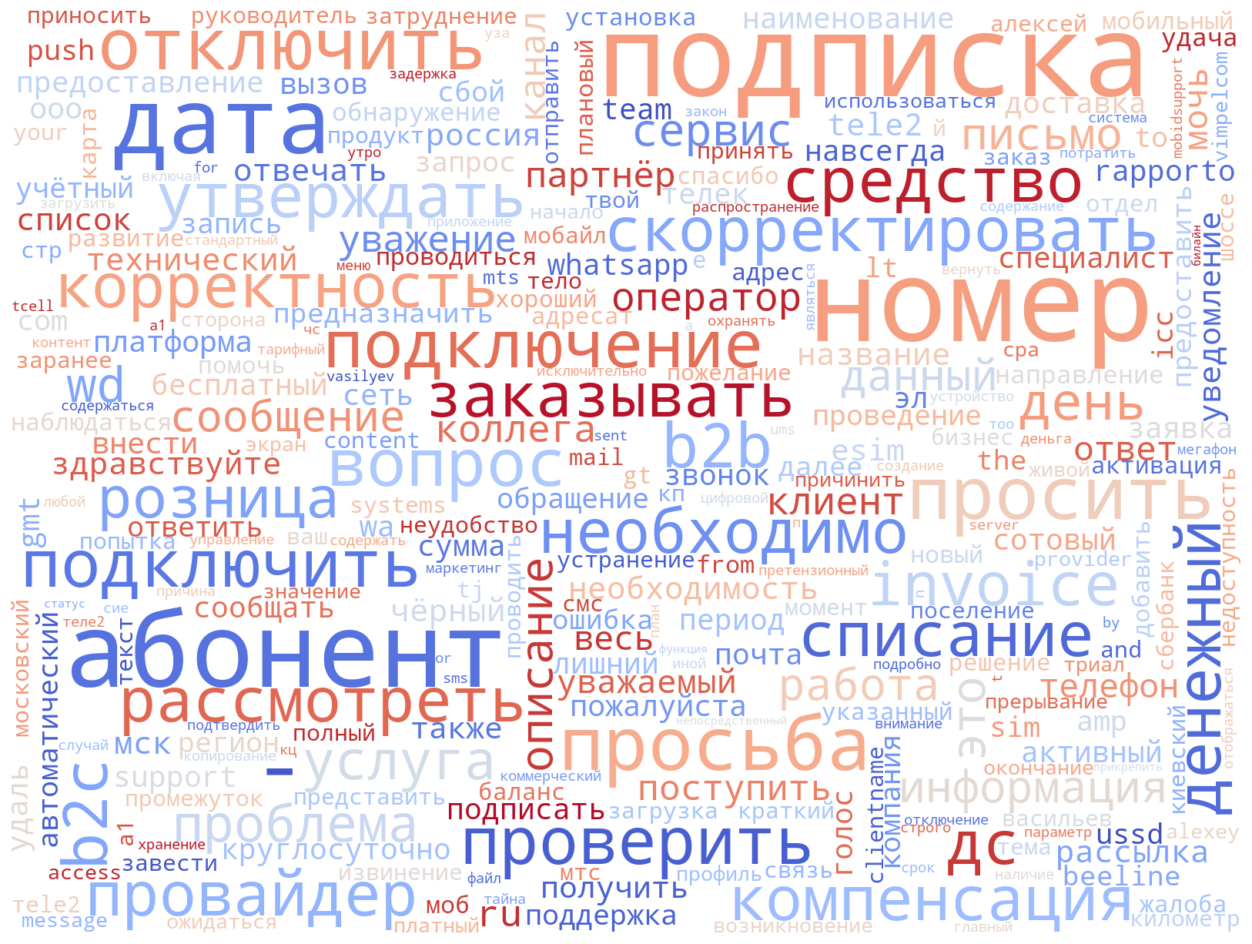

In [27]:
cloud = WordCloud(
    width=1600,
    height=1200,
    max_font_size=150,
    min_font_size=10,
    max_words=300,
    background_color='white',
    colormap="coolwarm",
    contour_color='black',
    relative_scaling=0.5,
    random_state=42
).generate_from_frequencies(cl_descr_keys)

plt.figure(figsize=(16, 12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
from collections import Counter

def lat_words(lst):
    return [word for word in lst if re.match(r'^[A-Za-z]+$', word)]

latin_words_ser = df['cleaned_words'].apply(lat_words)
latin_words = [word for sublist in latin_words_ser for word in sublist]
latin_word_counts = Counter(latin_words)

for word, count in latin_word_counts.most_common(100):
    print(f"{word}: {count} раз(а)")

invoice: 3739 раз(а)
wd: 2327 раз(а)
ru: 1308 раз(а)
esim: 811 раз(а)
support: 692 раз(а)
wa: 686 раз(а)
whatsapp: 636 раз(а)
gmt: 624 раз(а)
team: 595 раз(а)
rapporto: 587 раз(а)
com: 518 раз(а)
to: 501 раз(а)
amp: 497 раз(а)
ussd: 491 раз(а)
push: 477 раз(а)
sim: 473 раз(а)
icc: 470 раз(а)
lt: 451 раз(а)
the: 448 раз(а)
beeline: 434 раз(а)
from: 402 раз(а)
e: 388 раз(а)
gt: 381 раз(а)
tj: 349 раз(а)
mail: 339 раз(а)
systems: 322 раз(а)
clientname: 292 раз(а)
content: 288 раз(а)
your: 277 раз(а)
and: 272 раз(а)
access: 267 раз(а)
cpa: 262 раз(а)
vimpelcom: 260 раз(а)
provider: 259 раз(а)
mts: 253 раз(а)
alexey: 253 раз(а)
message: 247 раз(а)
vasilyev: 238 раз(а)
a: 233 раз(а)
tcell: 232 раз(а)
sms: 231 раз(а)
sent: 227 раз(а)
server: 226 раз(а)
by: 207 раз(а)
for: 205 раз(а)
ums: 203 раз(а)
mobidsupport: 191 раз(а)
n: 190 раз(а)
t: 181 раз(а)
or: 178 раз(а)
of: 166 раз(а)
zagruzka: 163 раз(а)
has: 161 раз(а)
uz: 157 раз(а)
s: 156 раз(а)
in: 156 раз(а)
this: 153 раз(а)
si: 153 раз(а)
y

## Перевод ключевых слов на русский язык

In [29]:
replacement_dict = {
    'provider': 'провайдер',
    'esim': 'есим',
    'b2b': 'б2б',
    'b2c': 'б2с',
    'invoice': 'инвойс',
    'tele2': 'теле2',
    'mts': 'мтс',
    'sim': 'сим',
    'server': 'сервер',
    'sms': 'смс',
    'vimpelcom': 'вымпелком',
    'whatsapp': 'ватсапп',
    'message': 'сообщение',
    'access': 'доступ',
    'team': 'команда',
    'systems': 'система',
    'delivery': 'доставка',
    'diagnostic': 'диагностика',
    'information': 'информация',
    'help': 'помощь'
}

def process_words(words):
    return [replacement_dict.get(word.lower(), word.lower()) for word in words
            if not (word == '-' or re.match(r'^[A-Za-z0-9]+$', word)) or word.lower() in replacement_dict]


df['cleaned_words_ru'] = df['cleaned_words'].apply(process_words)

In [30]:
df['cleaned_words_ru'].head(20)

0                     [просьба, ответ, запрос, использьзовать, функция, ответить, весь, абонент, всплывать, сим, меню, блокировать, работа, телефон, просьба, отключить, функционал, сие, ремандёр, апплет, сие, карта, номер, абонент, дата, заказ, номер, провайдер, кц, инвойс, розница, номер, подписка, описание, проблема, отключаться, тело, меню, текст, сообщение, эк]
1                                                                                             [абонент, утверждать, заказывать, просить, проверить, корректность, списание, рассмотреть, вопрос, компенсация, просьба, отключить, абонент, подписка, номер, подключить, подписка, б2с, дата, подключение, подписка, б2б, дата, необходимо, скорректировать, денежный, средство]
2                              [абонент, утверждать, заказывать, просить, проверить, корректность, списание, рассмотреть, вопрос, компенсация, просьба, отключить, абонент, подписка, удаль, лишний, информация, номер, подключить, подписка, б2с, дата, подключение, по

---
Посмотрим на другие текстовые поля в датафрейме

---

In [31]:
df['sender_name'].value_counts().to_frame().head(20)

,count
sender_name,
content_problem,4648
Система Отчётности Смартер,689
service_cp,639
Rapporto Support,599
NOC Sberbank-Telecom,281
HelpDesk Info,258
mobileid@tele2.ru,250
no-reply,170
Svetlana N Minakova,142


In [32]:
df['sender_name_cut'] = df['sender_name'].where(df['sender_name'].isin(['content_problem', 'Система Отчётности Смартер', 'service_cp',
                                                  'Rapporto Support', 'NOC Sberbank-Telecom', 'HelpDesk Info',
                                                  'mobileid@tele2.ru', 'no-reply', 'postmaster', 'MobIDsupport',
                                                                        'Help-And-Support-Partner'
                                                  ]))

In [33]:
df['theme'].unique().tolist()

['Жалоба абонента  TT20595877',
 'Жалоба абонента  TT20592639',
 'Жалоба абонента  TT20594559',
 'Жалоба абонента  TT20593507',
 'Жалоба абонента  TT20593899',
 'Re: [Ticket#10276498] Уведомление.Сбой на стороне оператора Теле2-Казахстан (01.01.23 14:19-15:03)',
 'ЧС по 99993 от 01.01.2023',
 'Жалоба абонента  TT20595548',
 'Жалоба абонента  TT20598328',
 'Жалоба абонента  TT20591891',
 'отключение',
 'Жалоба TT20600601',
 'ЧС по 99993 от 02.01.2023',
 'Undeliverable: A1S: Политика обновления вашего пароля',
 'Жалоба абонента  TT20604112',
 'Not Provided',
 'Sim reminder',
 'Жалоба абонента  TT20603820',
 'ЧС по 99993 от 03.01.2023',
 'Жалоба абонента  TT20605734',
 'Жалоба абонента  TT20606265',
 'Жалоба абонента  TT20606295',
 'Жалоба абонента  TT20606331',
 'Контент 1325',
 'Жалоба абонента  TT20608996',
 'Жалоба абонента  TT20607974',
 'Жалоба абонента  TT20608331',
 'Жалоба абонента  TT20610267',
 'Жалоба абонента  TT20609882',
 'DHL Shipping Document/Invoice Receipt',
 'Жалоба аб

In [34]:
def process_text(text):
    text = re.sub(r'\s*TT\d{8}', '', text)

    for eng_word, rus_word in replacement_dict.items():
        text = text.replace(eng_word.lower(), rus_word)
    if 'ЧС' in text:
        return ['черный список']
    if 'зарегистрировано обращение' in text.lower():
      return ['регистрация обращения']

    text = re.sub(r'[A-Za-z]', '', text)
    text = re.sub(r'[^\w\s-]', ' ', text)
    words = text.lower().split()

    return [morph.parse(word)[0].normal_form for word in words if re.search(r'[а-яёa-z]', word)]

df['processed_theme'] = df['theme'].apply(process_text)

df[['theme', 'processed_theme']].head(20)

,theme,processed_theme
0,Жалоба абонента TT20595877,"[жалоба, абонент]"
1,Жалоба абонента TT20592639,"[жалоба, абонент]"
2,Жалоба абонента TT20594559,"[жалоба, абонент]"
3,Жалоба абонента TT20593507,"[жалоба, абонент]"
4,Жалоба абонента TT20593899,"[жалоба, абонент]"
5,Re: [Ticket#10276498] Уведомление.Сбой на стороне оператора Теле2-Казахстан (01.01.23 14:19-15:03),"[уведомление, сбой, на, сторона, оператор, теле2-казахстан]"
6,ЧС по 99993 от 01.01.2023,[черный список]
7,Жалоба абонента TT20595548,"[жалоба, абонент]"
8,Жалоба абонента TT20598328,"[жалоба, абонент]"
9,Жалоба абонента TT20591891,"[жалоба, абонент]"


In [35]:
df['texts_cmb'] = df.apply(lambda x: ' '.join(x['processed_theme'] + x['cleaned_words_ru']), axis=1)

In [36]:
df_prep = df[['start_dt',	'end_dt',	'sender_name',	'sender_email',	'theme','descr',
              'sender_name_cut', 'texts_cmb']]

In [ ]:
df_prep.to_csv('tickets_processed.csv')

**Таким образом:**
* Данные очищены и подготовлены для word2vec
* Удалены стоп-слова
* Проведена лемматизация
* Обработаны значения из других текстовых столбцов, которые могут помочь в определении категорий
* После очистки поля объединены

Что требуется сделать:
* Сделать отдельную очистку с сохранением разделения на предложения (точки) для LLM, там же убрать лишние слова (номер, телефон) для лучшего разделения на кластеры